In [108]:
import time

from collections import Counter

from typing import List, Tuple

from src.main import generate_random_password, password_selection

In [109]:
import matplotlib.pyplot as plt

### Проверка равномерности распределения символов путем визуализации частотного распределения

In [110]:
def visualize_frequency_distribution(password: str):
    counter = Counter(password)
    symbols = counter.keys()
    frequencies = counter.values()

    plt.bar(symbols, frequencies)

    plt.title(f"Частотное распределение символов пароля длинной {len(password)}")
    plt.xlabel("Символы")
    plt.ylabel("Частота")

    plt.xticks(rotation=90)

    plt.show()

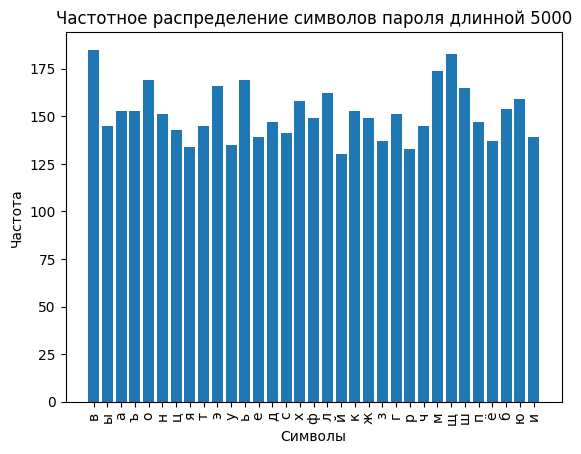

In [111]:
# 5000 символов
password = generate_random_password(5000)
visualize_frequency_distribution(password)

### График зависимости времени подбора пароля от его длины

In [112]:
def visualize_selection_length_time(entries: List[Tuple[int, int]]):
    password_lengths = [entry[0] for entry in entries]
    avg_time = [entry[1] for entry in entries]

    plt.plot(password_lengths, avg_time)

    plt.title(f"График зависимости среднего времени подбора пароля от его длины")
    plt.xlabel("Длина")
    plt.ylabel("Время")

    plt.show()

In [113]:
FROM, TO = 1, 5

entries: List[Tuple[int, int]] = []

for password_length in range(FROM, TO + 1):
    password = generate_random_password(password_length)
    start = time.time()
    password_selection(target_password=password)
    end = time.time()
    entries.append((password_length, end - start))

visualize_selection_length_time(entries)

Функция password_selection выполнилась за 9.059906005859375e-06 сек.
Функция password_selection выполнилась за 0.0002579689025878906 сек.
Функция password_selection выполнилась за 0.007535219192504883 сек.
Функция password_selection выполнилась за 0.4116811752319336 сек.
